In [ ]:
# Importing required librarires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.color_palette("husl", 9)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import string

In [3]:
result = string.ascii_letters 

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [5]:
df = pd.read_csv (r'C:\Users\ADMIN\Desktop\Python project\world-happiness-report-2021.csv')

In [56]:
df.head ()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
# Fetching necessary columns for the analysis

In [6]:
df_columns = ['Country name','Regional indicator','Happiness score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [7]:
df = df[df_columns].copy()

In [8]:
df.head()

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [6]:
happy_df = df.rename(columns={'Country name' : 'country_name','Regional indicator'  :'regional_indicator','Happiness score' : 'happiness_score','Logged GDP per capita' : 'logged_GDP_per_capita','Social support' : 'social_support','Healthy life expectancy' : 'healthy_life_expectancy','Freedom to make life choices' : 'freedom_to_make_life_choices','Generosity' : 'generosity','Perceptions of corruption' : 'perceptions_of_corruption'})

In [10]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [69]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_GDP_per_capita           0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [ ]:
# Realtionship between Happiness score & GDP

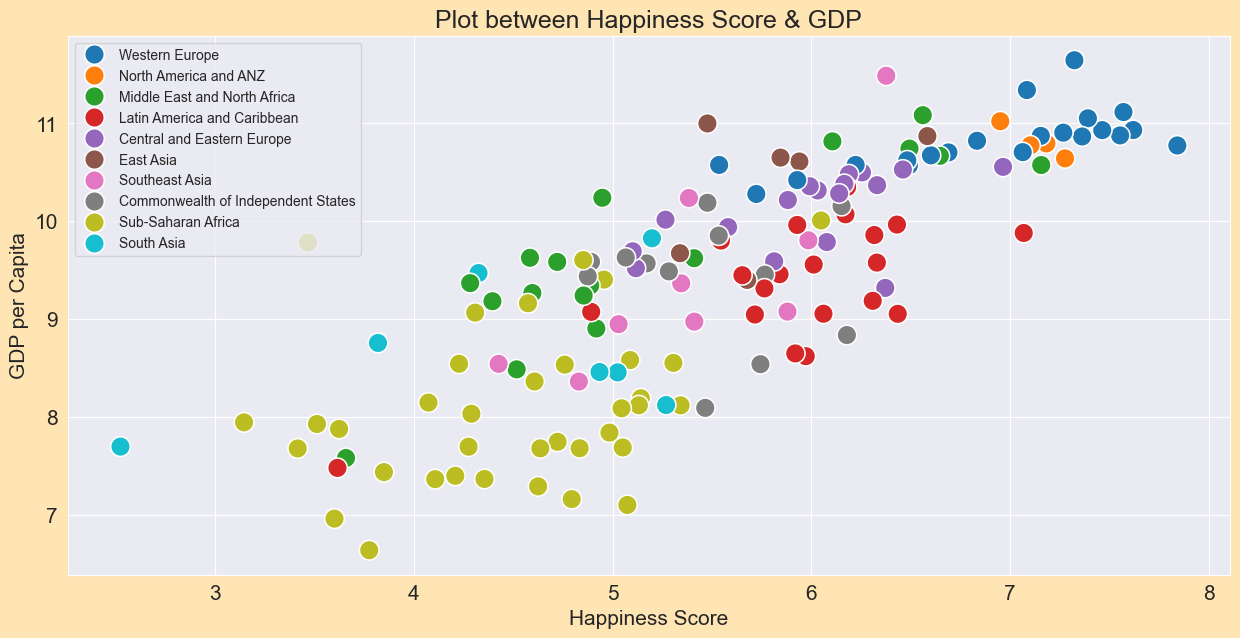

In [76]:
plt.rcParams['figure.figsize']= (15,7)
plt.title ('Plot between Happiness Score & GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.logged_GDP_per_capita, hue = happy_df.regional_indicator, s = 200);
plt.legend (loc = 'upper left', fontsize = '10')
plt.xlabel ('Happiness Score')
plt.ylabel ('GDP per Capita')
plt.show()

In [ ]:
# Findings of the plots-
1-Western Europe region has both higher happiness scores & GDP per capita.
2-Sub-Saharan African regions have very little GDP per capita & less happiness score.
3-Afghanistan has the lowest happiness score from the south Asia region.

In [77]:
gdp_region = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum ()

In [78]:
print (gdp_region)

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64


In [ ]:
# Distribution of GDP

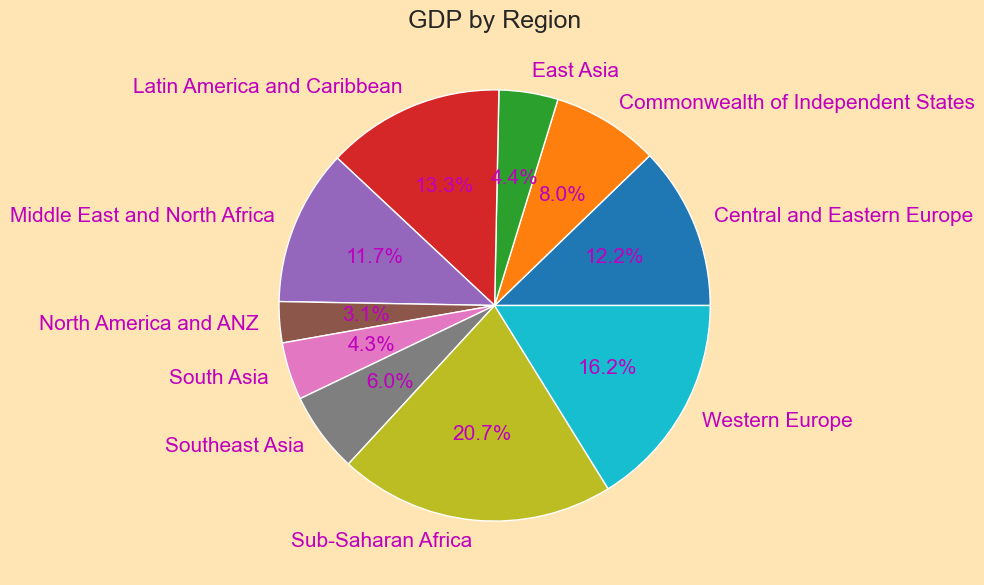

In [96]:
gdp_region.plot.pie(autopct = '%1.1f%%',textprops={'color':"m",'fontsize': 15})
plt.title ('GDP by Region')
plt.ylabel ('')
plt.show ()                    

In [ ]:
# Findings of the plots-
1-Sub-Saharan Africa region contributes the highest to the world GDP as region contains 36 countries.
2-North America & ANZ region contributing least to the world GDP as only 4 countries are there in this region.

In [11]:
total_country = happy_df.groupby ('regional_indicator')[['country_name']].count ()
print (total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


In [ ]:
# There are total 10 regions accross the world.

In [ ]:
# Analysis of the Perceptions of Corruption

In [14]:
corruption = happy_df.groupby ('regional_indicator')[['perceptions_of_corruption']].mean ()
print (corruption)

                                    perceptions_of_corruption
regional_indicator                                           
Central and Eastern Europe                           0.850529
Commonwealth of Independent States                   0.725083
East Asia                                            0.683333
Latin America and Caribbean                          0.792600
Middle East and North Africa                         0.762235
North America and ANZ                                0.449250
South Asia                                           0.797429
Southeast Asia                                       0.709111
Sub-Saharan Africa                                   0.765944
Western Europe                                       0.523095


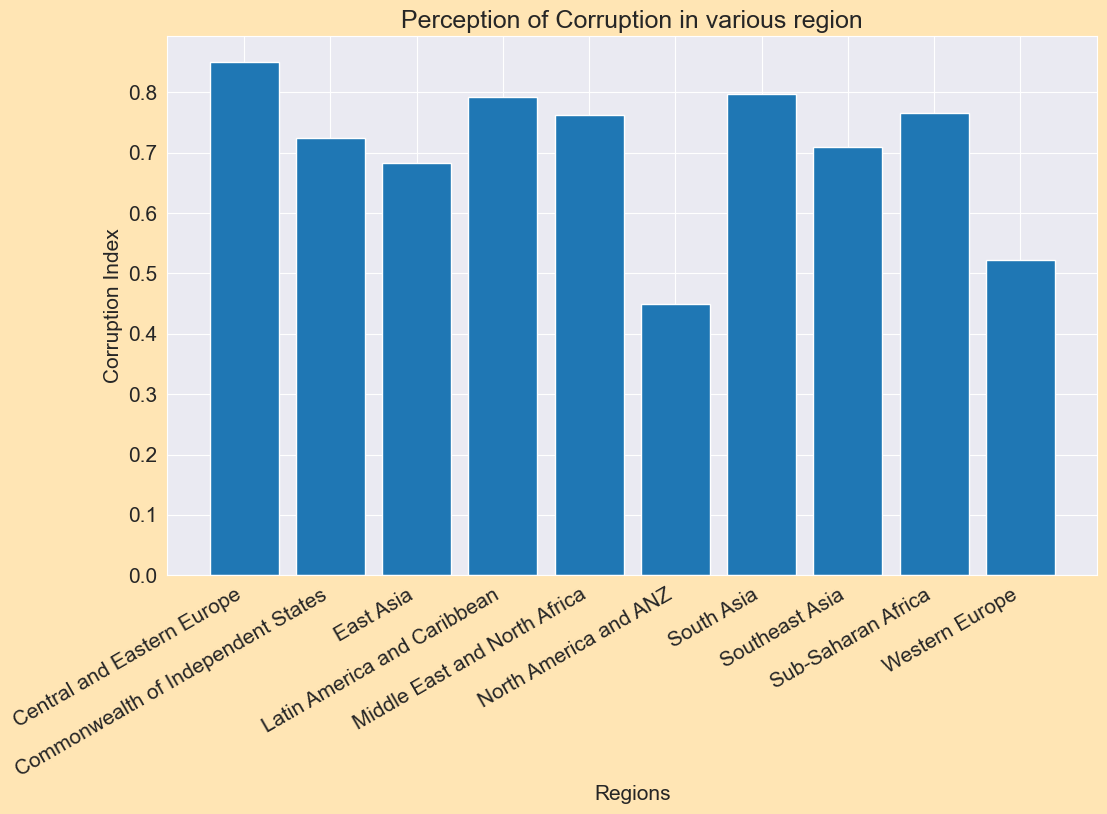

In [53]:
plt.rcParams['figure.figsize']= (12,7)
plt.title ('Perception of Corruption in various region')
plt.bar (corruption.index,corruption.perceptions_of_corruption)
plt.xlabel ('Regions', fontsize = 15)
plt.ylabel ('Corruption Index', fontsize =15)
plt.xticks (rotation = 30, ha = 'right')
plt.show()

In [ ]:
# Findings of the plots-
1-North America & ANZ region has the lowest perceptions of corruption followed by Western Europe.
2-Central & Eastern Europe has the highest perceptions of corruption.

In [11]:
top_10 = happy_df.head (10)
bottom_10 = happy_df.tail (10)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17808\401288641.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes [0].set_xticklabels (xlabels, rotation = 45, ha = 'right')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17808\401288641.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes [1].set_xticklabels (xlabels, rotation = 45, ha = 'right')


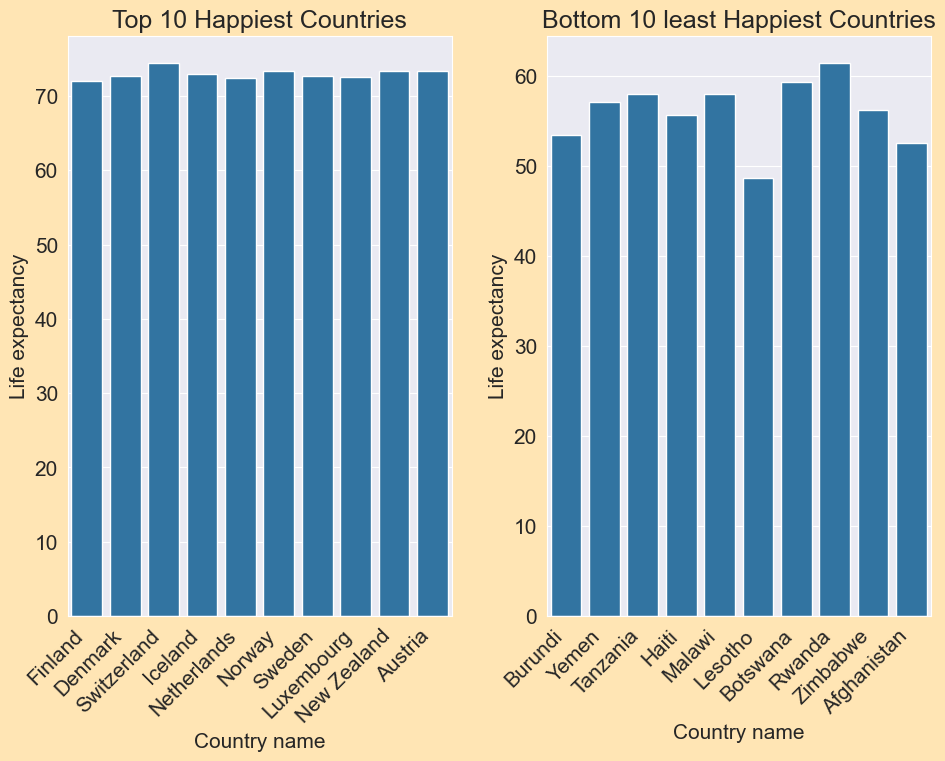

In [37]:
fig = plt.figure.figsize= (16, 6)
fig,axes = plt.subplots (1,2)
plt.tight_layout (pad = 2)
xlabels = top_10.country_name
axes [0].set_title ('Top 10 Happiest Countries')
axes [0].set_xticklabels (xlabels, rotation = 45, ha = 'right')
sns.barplot (x = top_10.country_name, y = top_10.healthy_life_expectancy, ax = axes [0])
axes [0].set_xlabel ('Country name')
axes [0].set_ylabel ('Life expectancy')

xlabels = bottom_10.country_name
axes [1].set_title ('Bottom 10 least Happiest Countries')
axes [1].set_xticklabels (xlabels, rotation = 45, ha = 'right')
sns.barplot (x = bottom_10.country_name, y = bottom_10.healthy_life_expectancy, ax = axes [1])
axes [1].set_xlabel ('Country name')
axes [1].set_ylabel ('Life expectancy')
plt.show ()

In [ ]:
# Findings of the plots-
1-Switzerland has the highest life expectancy whereas Lesotho has the lowest life expectancy.
2-Western Europe region has most of the countries having the highest life expectancy.
3-Total 7 countries out of 10 falling under lowest life expectancy. The remaining 3 countries belong to the Middle East & North Africa, Latin America & Caribbean,South Asia.

In [ ]:
# Realtionship between Happiness score & Freedom to make life choices

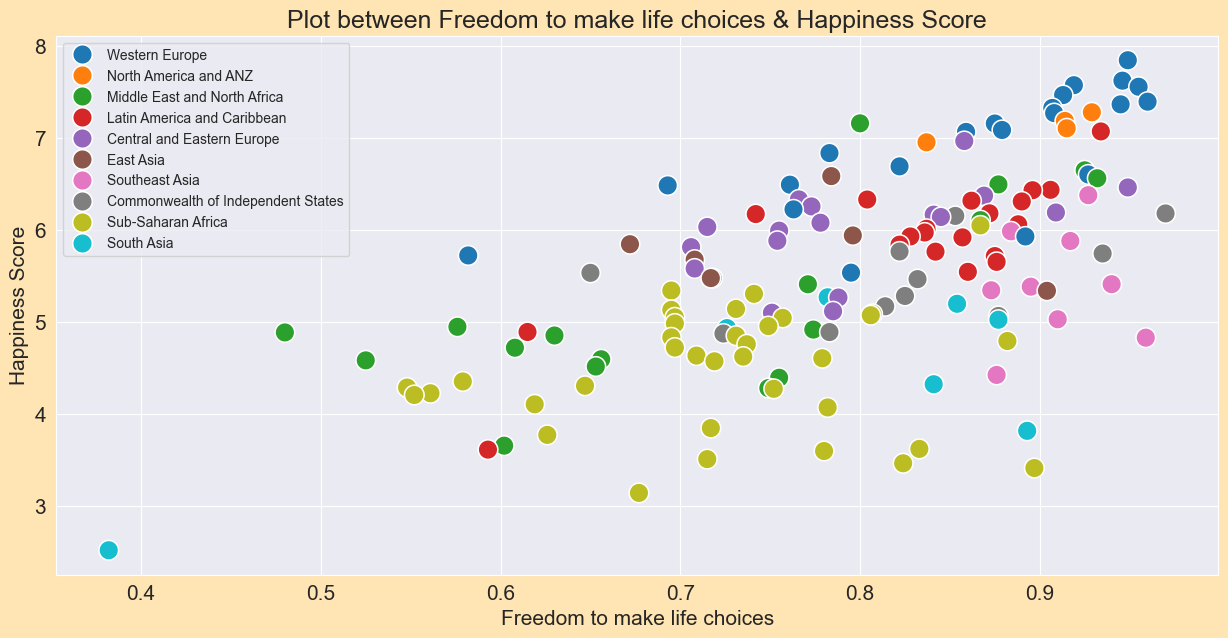

In [39]:
plt.rcParams['figure.figsize']= (15,7)
plt.title ('Plot between Freedom to make life choices & Happiness Score')
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score, hue = happy_df.regional_indicator, s = 200);
plt.legend (loc = 'upper left', fontsize = '10')
plt.xlabel ('Freedom to make life choices')
plt.ylabel ('Happiness Score')
plt.show()

In [ ]:
# Findings of the plots-
1-Western European countries have higher scores for Freedom to make life choices so as Happiness scores.
2-Afghanistan from South Asia has the lowest score for Freedom to make life choices so as Happiness score.

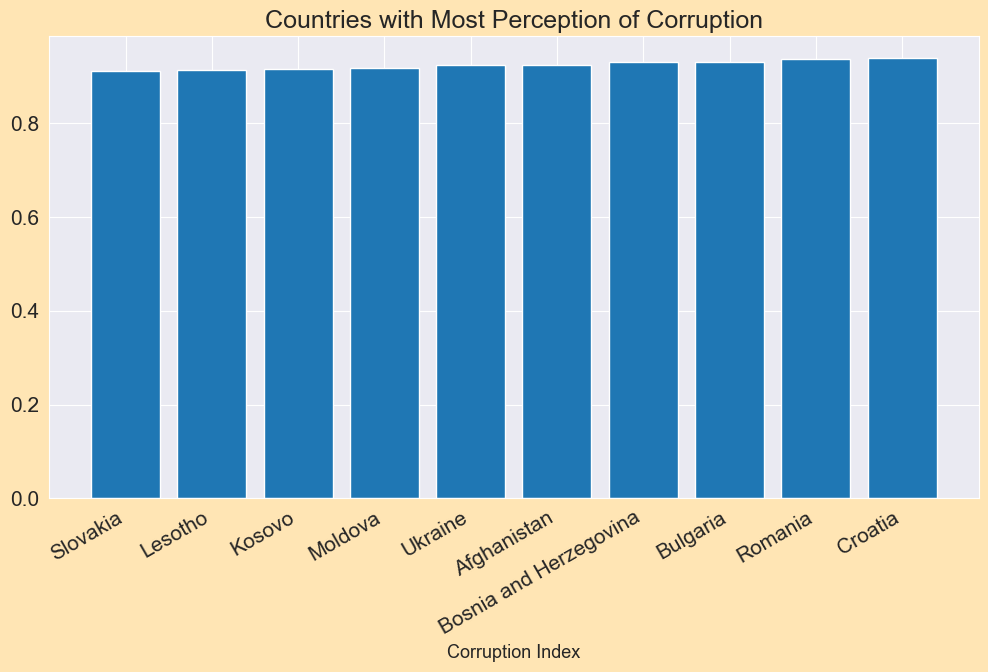

In [49]:
ax = happy_df.sort_values (by = 'perceptions_of_corruption').tail (10)
plt.rcParams ['figure.figsize'] = (12,6)
plt.title ('Countries with Most Perception of Corruption')
plt.xlabel ('Country', fontsize = 13)
plt.xlabel ('Corruption Index', fontsize = 13)
plt.xticks (rotation = 30, ha = 'right')
plt.bar (ax.country_name, ax.perceptions_of_corruption)
plt.show  ()

In [ ]:
# Findings of the plots-
A total of 5 countries are in the group of 10 countries having the highest corruption.

In [ ]:
# Realtionship between Happiness score & Perception of Corruption

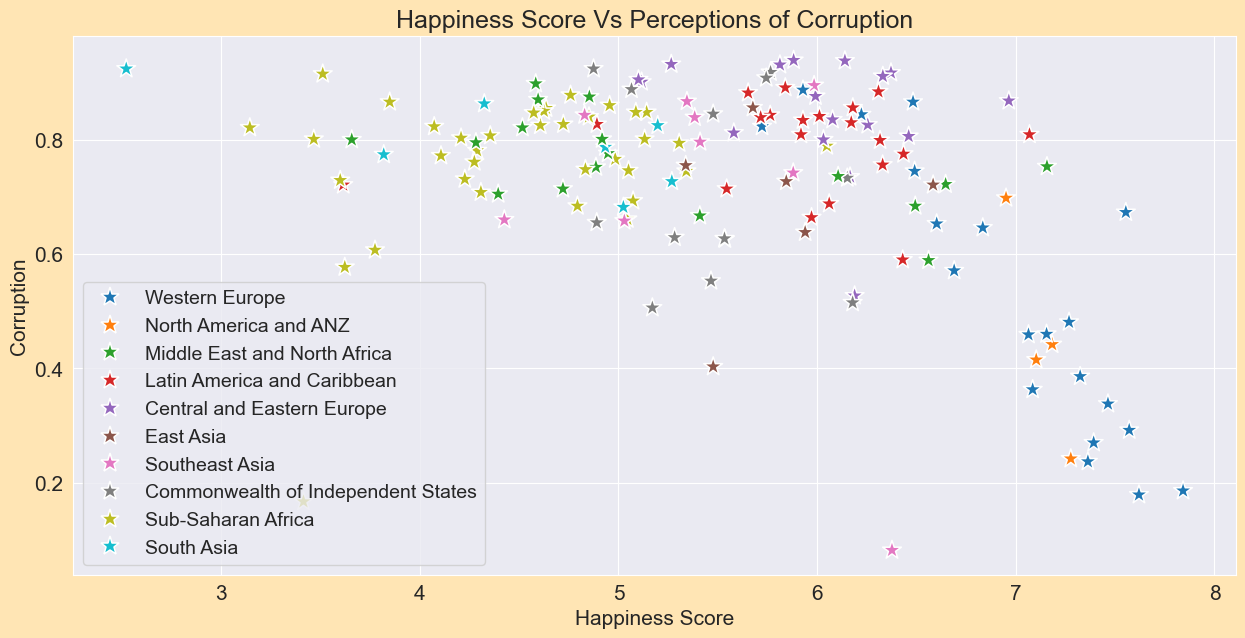

In [53]:
plt.rcParams['figure.figsize']= (15,7)
plt.title ('Happiness Score Vs Perceptions of Corruption')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.perceptions_of_corruption, hue = happy_df.regional_indicator, s = 200, marker = '*');
plt.legend (loc = 'lower left', fontsize = '14')
plt.xlabel ('Happiness Score')
plt.ylabel ('Corruption')
plt.show()

In [ ]:
# Findings of the plots-
1-Countries belonging to Western Europe have lower corruption scores so as they have high happiness scores.
2-Sub-Saharan Africa & South Asia region countries have lower Happiness scores. Accordingly, they have higher perceptions of corruption.